In [1]:
import os

In [2]:
os.chdir('../..')

In [3]:
import tensorflow as tf

In [49]:
from importlib import reload

In [11]:
reload(da)

<module 'dev.python.utils.data_augmentation' from '/home/app/dev/python/utils/data_augmentation.py'>

# Prep

## Loading Model

In [4]:
# @keras.utils.register_keras_serializable
model = tf.keras.models.load_model('data/model/TinyYolo_530')

## Load img

In [5]:
import cv2
import dev.python.utils.data_augmentation as da
import PIL
import PIL.Image as Image
import numpy as np
import random

In [6]:
import imgaug as ia
import imgaug.augmenters as iaa

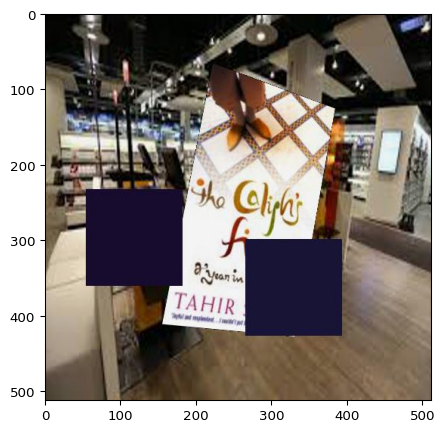

In [7]:
augmented_img_dir = 'data/output/tests/augmented_covers/'
augmented_img_file = os.listdir(augmented_img_dir)[0]
augmented_img_path = augmented_img_dir+augmented_img_file
augmented_img = cv2.imread(augmented_img_path)
ia.imshow(augmented_img[:, :, ::-1])

# Eval

In [8]:
im, points = da.read_augmented_img_filename(augmented_img_path)
im, points

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F2228B62BE0>,
 array([[222,  67],
        [384, 126],
        [155, 412],
        [330, 428]]))

In [9]:
points.reshape(8)

array([222,  67, 384, 126, 155, 412, 330, 428])

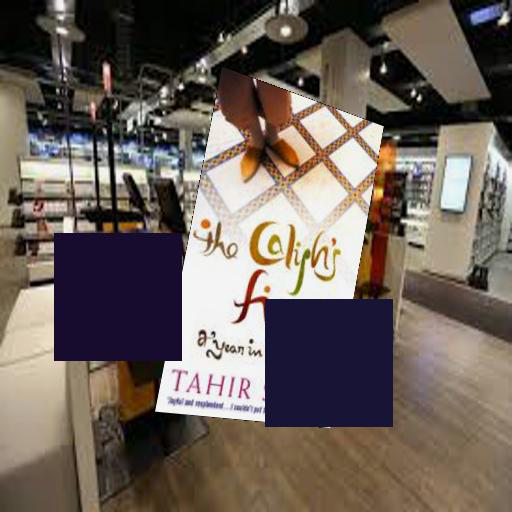

In [10]:
im

In [11]:
im_t = da.draw_circles(np.array(im), points)
im_t.shape

(512, 512, 3)

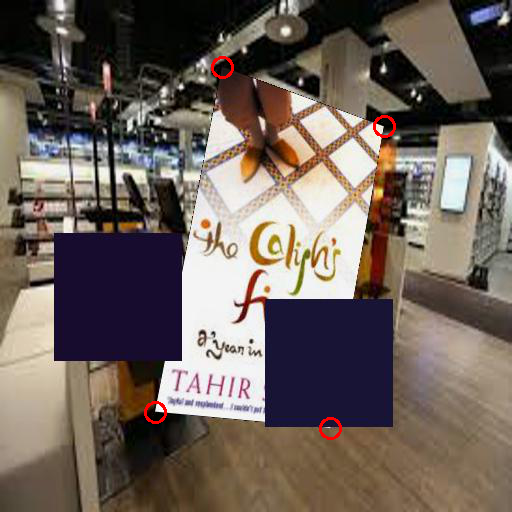

In [12]:
Image.fromarray(im_t)

## Pred

In [60]:
reload(loss)

<module 'dev.python.training.losses' from '/home/app/dev/python/training/losses.py'>

In [13]:
im_in = np.array(im).reshape(1, 512, 512, 3)
im_in.shape

(1, 512, 512, 3)

In [14]:
#im_in_t = np.repeat(im_in, repeats=64, axis=0)
#im_in_t.shape

In [72]:
im_out_t1 = model(im_in/255)
im_out_t1.shape, im_out_t1

(TensorShape([1, 9]),
 <tf.Tensor: shape=(1, 9), dtype=float32, numpy=
 array([[225.6763 ,  68.58597, 386.48538, 129.14651, 159.36261, 419.7415 ,
         335.72202, 437.23486, -39.09688]], dtype=float32)>)

In [73]:
points.reshape(8)

array([222,  67, 384, 126, 155, 412, 330, 428])

In [83]:
p = im_out_t1.numpy().astype(np.uint16)[0][:8].reshape(4, 2)
p

array([[225,  68],
       [386, 129],
       [159, 419],
       [335, 437]], dtype=uint16)

In [75]:
p = (im_out_t1.numpy()[0][:8]).astype(np.uint8).reshape(4, 2)
p

array([[225,  68],
       [130, 129],
       [159, 163],
       [ 79, 181]], dtype=uint8)

In [53]:
import dev.python.training.losses as loss

In [55]:
from dev.python.training.losses import MSE_MSLE

In [35]:
true_label = np.concatenate((points.reshape(8), np.array([1]))).reshape(1, 9)
true_label

array([[222,  67, 384, 126, 155, 412, 330, 428,   1]])

In [ ]:
MSE = tf.reduce_mean(tf.keras.losses.MSE(y_true[:, :8], y_pred[:, :8]))
MSLE = tf.keras.losses.MSLE(y_true[:, -1], y_pred[:, -1])

In [61]:
loss.MSE_MSLE(true_label, im_out_t1.numpy())

<tf.Tensor: shape=(), dtype=float32, numpy=29.117363>

In [84]:
im_t = da.draw_circles(np.array(im), p)
im_t.shape

(512, 512, 3)

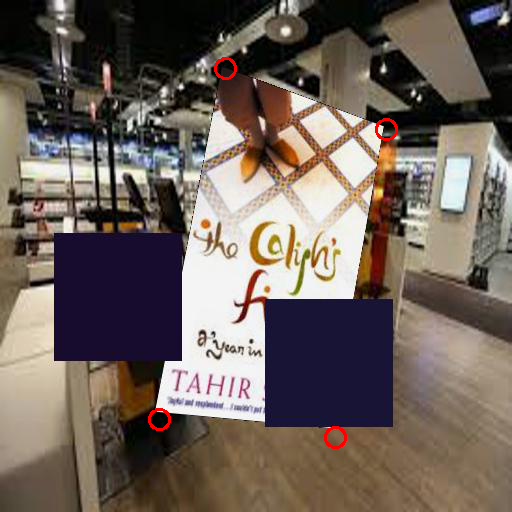

In [85]:
Image.fromarray(im_t)

# Real Image

In [124]:
os.listdir('data/input/live_pics/')

['09b1c657-8711-4405-9fb4-5709d58dc4f3.jpg',
 '0bc7e7d4-73e3-4a3c-b598-f48231afd565.jpg',
 '1195adda-91e2-4b56-9655-1f686e44f305.jpg',
 '1a89fb36-fd8f-4d7e-a77c-ab43b8076300.jpg',
 '1c28520f-a80f-4e19-ae87-56f1d23abd60.jpg',
 '1dd3edce-15fc-46e5-81fe-65d3be5ca86b.jpg',
 '1deb0504-17e7-4203-8433-c03245eae34a.jpg',
 '21ee133f-6d38-4233-b38c-16cdda8e2ebb.jpg',
 '2268ee4a-1e94-4685-9428-a7d4fbc165fa.jpg',
 '28273db2-2a6a-4ed1-bf05-47932bf6cd31.jpg',
 '2b22ec56-0597-496f-8a0b-b01115a7f6f2.jpg',
 '2f176d2c-56d1-4f01-81dd-d4f7e4deb10f.jpg',
 '30d7a5d6-2cfd-4553-89c8-9c997c576ae7.jpg',
 '34e464a3-1dd1-4258-aee7-3490785bb819.jpg',
 '3756523a-aa45-4eac-a1e0-d5ae8ce55100.jpg',
 '384417.jpg',
 '384799.jpg',
 '3a86456d-5272-4efa-83a7-9d514d190fe6.jpg',
 '3f3560cd-dcc6-4d07-bee8-d258ec836799.jpg',
 '42c47de7-70fd-49a6-908e-ee6e39b0e9ef.jpg',
 '44799e19-1824-47c4-96e5-1c5b1c825c94.jpg',
 '465daf1a-48ac-4ea1-b522-7f6d737dcf83.jpg',
 '4b90e153-1fd5-4b02-aaea-897e312e1926.jpg',
 '4e252b95-f041-4d57-8dc9

In [123]:
img_path = 'data/input/live_pics/e359f1c2-69f1-479f-81a7-96ff61088156.jpg'

In [125]:
img_path = 'data/input/live_pics/28273db2-2a6a-4ed1-bf05-47932bf6cd31.jpg'

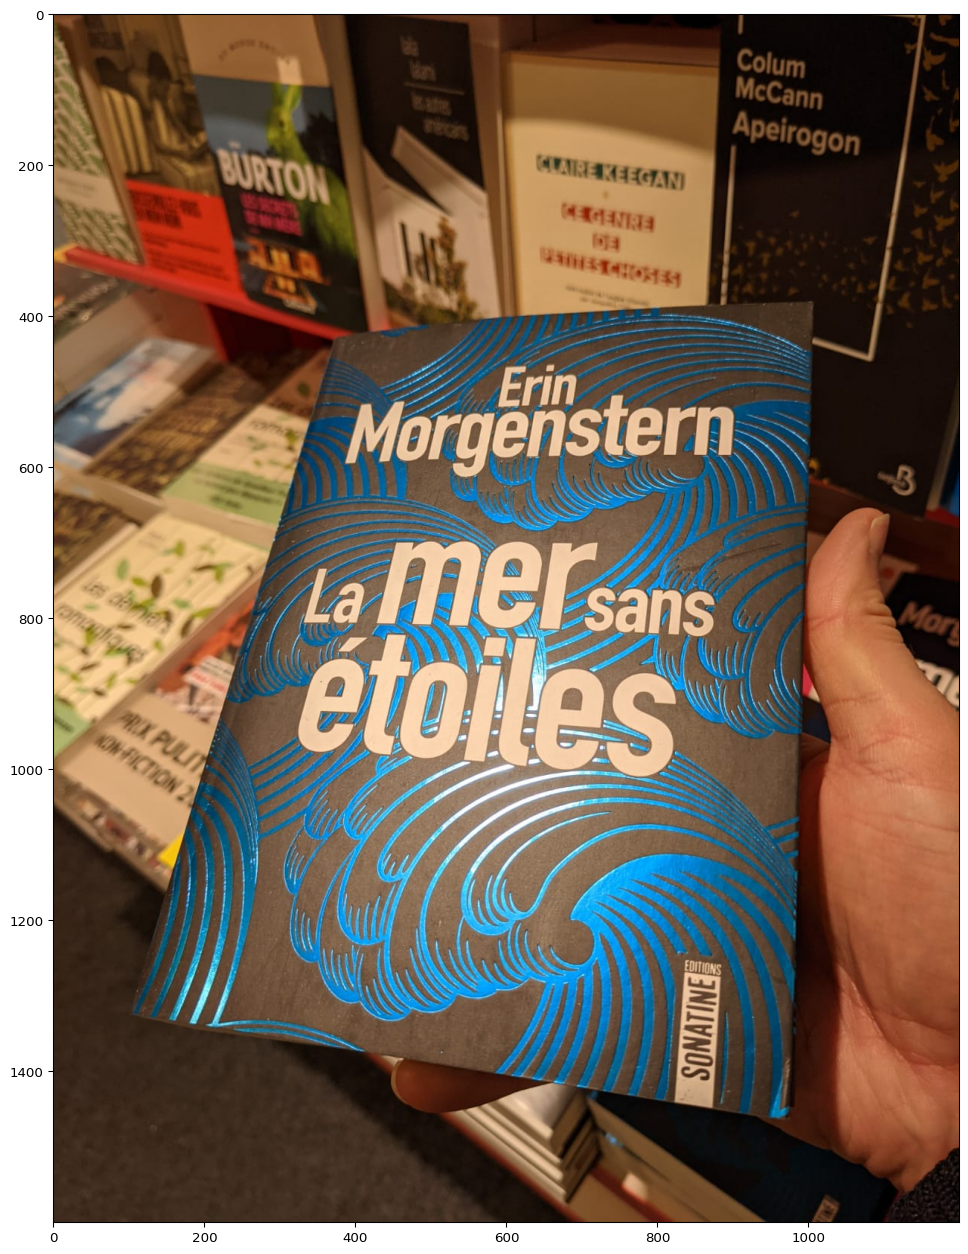

In [126]:
real_img = cv2.imread(img_path)
ia.imshow(real_img[:, :, ::-1])

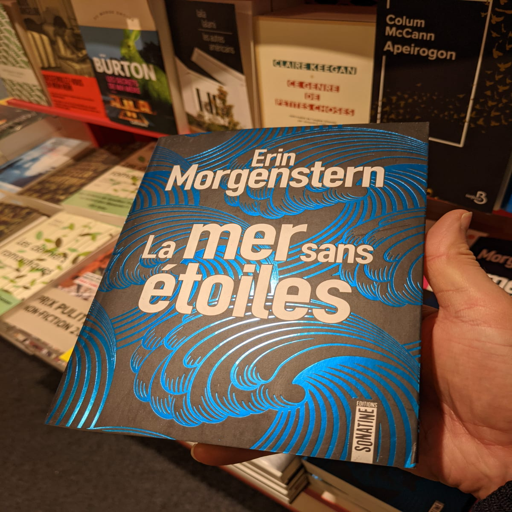

In [127]:
im_t = Image.fromarray(real_img[:, :, ::-1])
im_t = im_t.resize((512, 512))
im_t

In [128]:
im_out_t1 = model(np.array(im_t).reshape(1, 512, 512, 3)/255)
im_out_t1

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[ 79.54363 ,  90.14239 , 540.0059  , 204.47217 ,  10.892869,
        389.17505 , 481.55597 , 505.76318 , -29.004704]], dtype=float32)>

In [129]:
p = im_out_t1.numpy().astype(np.uint16)[0][:8].reshape(4, 2)
p

array([[ 79,  90],
       [540, 204],
       [ 10, 389],
       [481, 505]], dtype=uint16)

In [130]:
im_t2 = da.draw_circles(np.array(im_t), p)
im_t2.shape

(512, 512, 3)

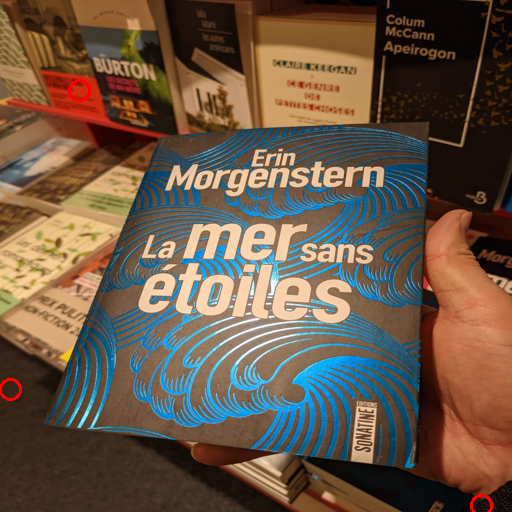

In [131]:
Image.fromarray(im_t2)